# Imports

##### General imports

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

In [2]:
import networkx as nx

##### Import from flatland environment 

In [3]:
from flatland.envs.rail_env import RailEnv
from flatland.envs.observations import *
from flatland.envs.rail_generators import complex_rail_generator,rail_from_manual_specifications_generator,random_rail_generator, RailGenerator
from flatland.envs.schedule_generators import complex_schedule_generator, random_schedule_generator, ScheduleGenerator
from flatland.utils.rendertools import RenderTool

##### Import from our framework

In [4]:
from src.graph import NetworkGraph
from src.flows import TimeNetwork

In [5]:
from src.flows import MCFlow

# Test of time expanded network

##### Create a flatland network

In [6]:
number_agents = 2

size_side = 20
env = RailEnv(width=size_side,
              height=size_side,
              rail_generator=complex_rail_generator(nr_start_goal=10, nr_extra=1, 
                                                    min_dist=6, max_dist=99999, 
                                                    seed = np.random.randint(0,2000)),
              schedule_generator=complex_schedule_generator(),
              number_of_agents=number_agents,
              obs_builder_object=GlobalObsForRailEnv())

env.reset()
matrix_rail = np.array(env.rail.grid.tolist())
flatlandNetwork = NetworkGraph(matrix_rail,[(0,1)],[(1,0)])

cycles detected in NetworkGraph, this may be due to the fact that endpoint can be used to do 180 turn


In [7]:
sources = []
sinks = []
for agent in env.agents:
    sources.append(agent.position)
    sinks.append(agent.target)

In [8]:
sources

[(5, 6), (19, 15)]

/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


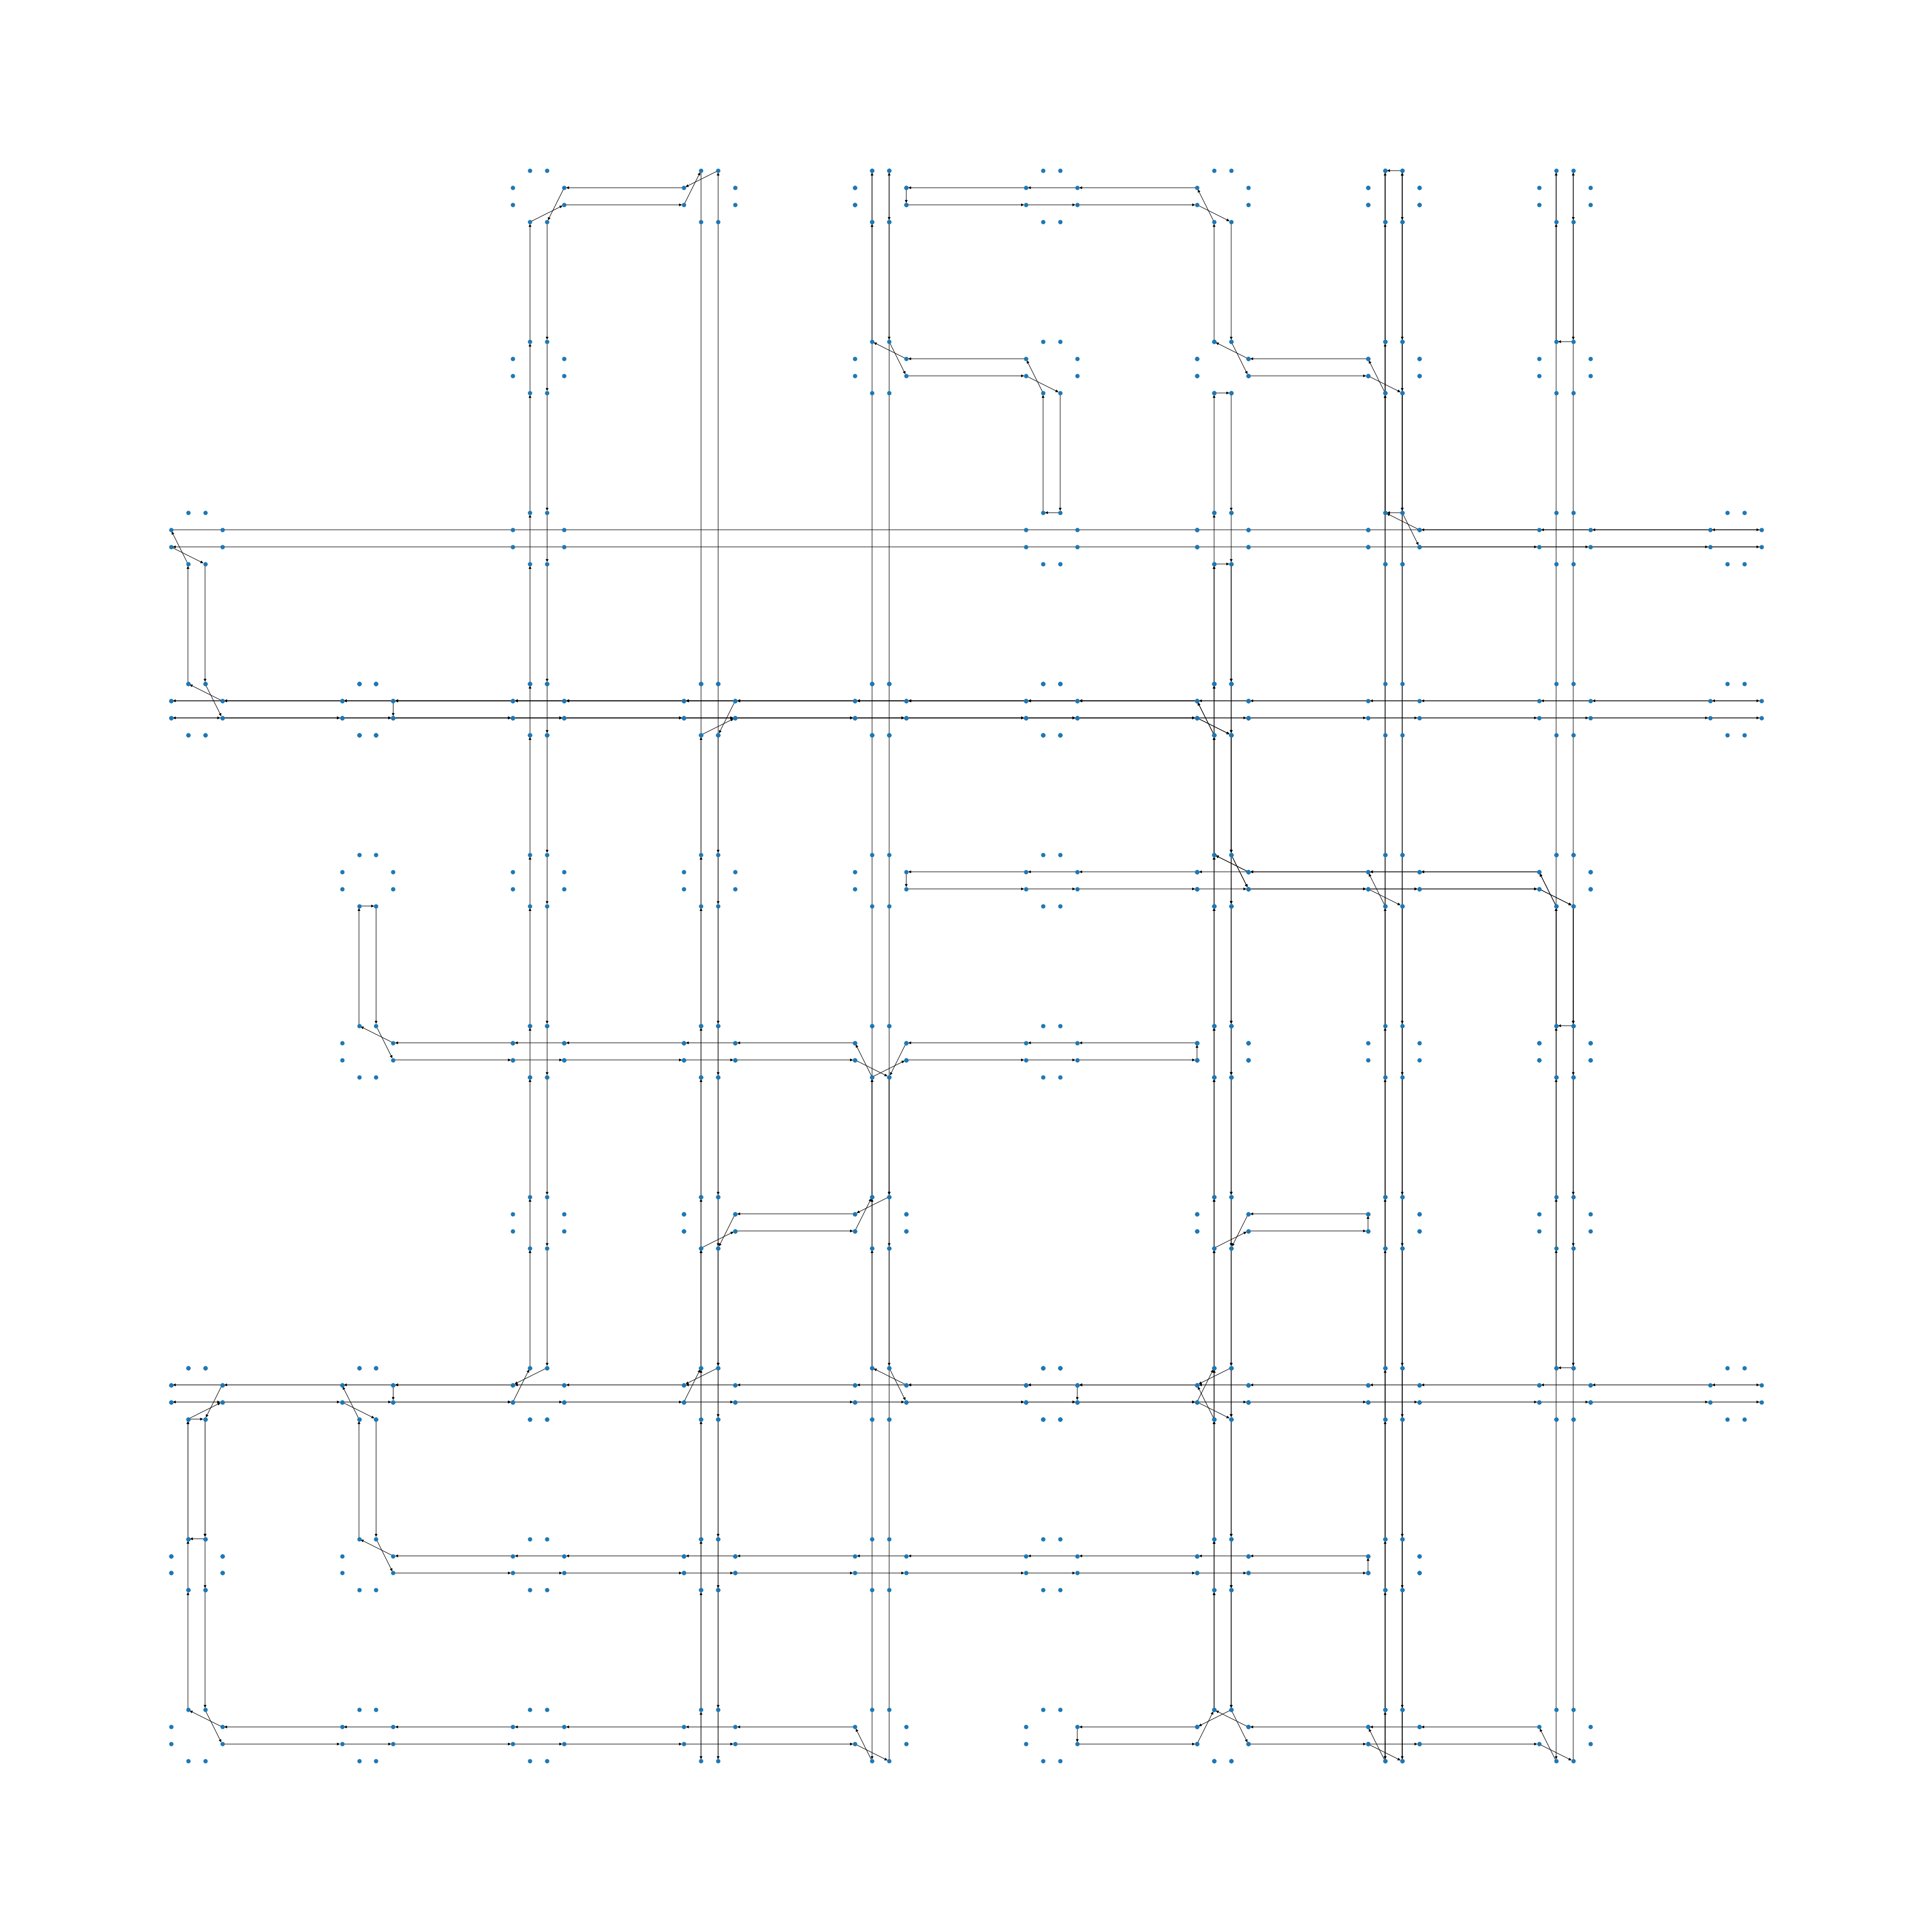

In [9]:
flatlandNetwork.show(jitter=0.1)

##### create a time expanded network

In [10]:
import time

In [11]:
start = time.time()
TestNetworkTime = TimeNetwork(flatlandNetwork, depth=100)
stop = time.time()
print(f'time taken to build the graph: {stop-start}')

time taken to build the graph: 5.249345064163208


In [12]:
#TestNetworkTime.show()

In [13]:
TestNetworkTime.connect_sources_and_sink(sources,sinks)

In [14]:
#TestNetworkTime.show()

##### Test LP Formulation

test a simple graph

In [15]:
mcflow = MCFlow(TestNetworkTime.graph,len(sources),TestNetworkTime.topology)

Academic license - for non-commercial use only


In [16]:
mcflow.solve()

Optimize a model with 287422 rows, 209164 columns and 784692 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 278616 rows and 190943 columns
Presolve time: 0.33s
Presolved: 8806 rows, 18221 columns, 36438 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.822e+04
 Factor NZ  : 2.627e+05 (roughly 13 MBytes of memory)
 Factor Ops : 1.872e+07 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.15593067e+05 -4.88071544e+05  1.69e+03 1.20e+01  5.97e+02     0s
   1   6.37773934e+04 -4.64100801e+05  4.92e+02 2.84e-14  1.78e+02     0s
   2   1.96897724e+04 -4.01620260e+05  1.45e+02 6.39e-14  5.62e+01     0s
   3   8.36045856e+03 -1

In [17]:
paths = mcflow.extract_paths()

In [18]:
mcflow.check_no_collisions_solution(paths)

True

In [19]:
paths

{0: ['source_agent_0',
  '(5, 5)_E_in_t1',
  '(5, 5)_W_out_t2',
  '(5, 5)_E_in_t1',
  '(5, 4)_E_in_t3',
  '(5, 4)_S_out_t4',
  '(6, 4)_N_in_t5',
  '(6, 4)_W_out_t6',
  '(6, 3)_E_in_t7',
  '(6, 3)_S_out_t8',
  '(7, 3)_N_in_t9',
  '(7, 3)_S_out_t10',
  '(8, 3)_N_in_t11',
  '(8, 3)_S_out_t12',
  '(9, 3)_N_in_t13',
  '(9, 3)_S_out_t14',
  '(10, 3)_N_in_t15',
  '(10, 3)_W_out_t16',
  '(10, 2)_E_in_t17',
  '(10, 2)_E_in_t18',
  '(10, 2)_E_in_t19',
  '(10, 2)_S_out_t20',
  '(11, 2)_N_in_t21',
  '(11, 2)_S_out_t22',
  '(12, 2)_N_in_t23',
  '(12, 2)_S_out_t24',
  '(13, 2)_N_in_t25',
  '(13, 2)_S_out_t26',
  '(14, 2)_N_in_t27',
  '(14, 2)_S_out_t28',
  '(15, 2)_N_in_t29',
  '(15, 2)_S_out_t30',
  '(16, 2)_N_in_t31',
  '(16, 2)_S_out_t32',
  '(17, 2)_N_in_t33',
  '(17, 2)_W_out_t34',
  '(17, 2)_W_out_t35',
  '(17, 2)_W_out_t36',
  '(17, 2)_W_out_t37',
  '(17, 2)_W_out_t38',
  '(17, 2)_W_out_t39',
  '(17, 2)_W_out_t40',
  '(17, 2)_W_out_t41',
  '(17, 2)_W_out_t42',
  '(17, 2)_W_out_t43',
  '(17, 2